In [78]:
#Importing numpy,pandas and matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import os

In [69]:
# Got the dataset from kaggle read the dataset in the dataframe
#There are 784 dimensions and 60000 Records for the train dataset.
d0=pd.read_csv('./data/mnist_train.csv')
print(d0.head(5))
l=d0['label']
d=d0.drop("label",axis=1)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [70]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


C:\Users\shan3\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


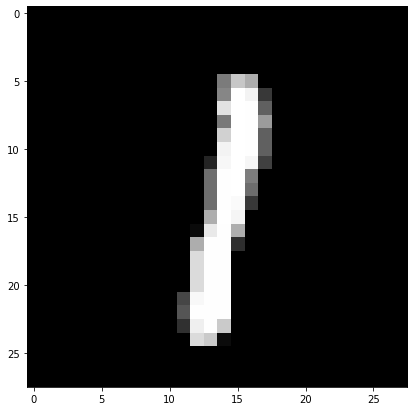

1


In [71]:
#Display a plot or a number
plt.figure(figsize=(7,7))
idx=1200
grid_data=d.iloc[idx].as_matrix().reshape(28,28)#Reshape the matrix
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

In [72]:
#Data preprocessing :standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(d)
print(standardized_data.shape)
#find the covariance of matrix
sample_data=standardized_data




(60000, 784)


In [73]:
#find the covariance of matrix
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)

(784, 784)


In [74]:
from sklearn  import decomposition
pca=decomposition.PCA()
d0=pd.read_csv('./data/mnist_train.csv')

label=d0['label']

In [75]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

print("shape of pca_reduced.shape",pca_data.shape)


shape of pca_reduced.shape (60000, 2)


In [76]:
pca_data = np.vstack((pca_data.T, label)).T
pca_data.shape



(60000, 3)

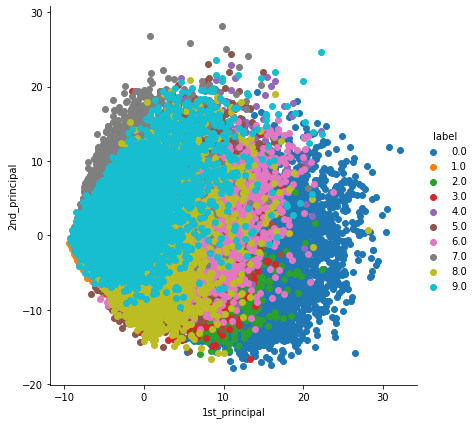

In [79]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show();

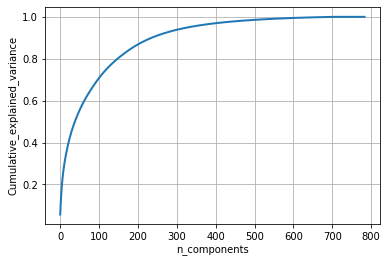

In [80]:

# Understanding pca

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
